In [1]:
import pandas as pd
import numpy  as np

from scipy.stats import  mannwhitneyu, ks_2samp

import matplotlib.pyplot as plt 
from matplotlib import ticker
from matplotlib.gridspec import GridSpec


from pathlib import Path

import time

import pickle

import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  nru_DE import DE_H_stats
from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "10k_brain"

data_path = Path ( data_folder + data_subfolder )

In [3]:
# output plot
plot_jpg =  data_subfolder + "_Figure_7.jpg"

# output data
DE_stats_pkl = "DE_stats_SCT.pkl"


# input data - to calculate DE for SCTransform residuals
Pearson_residuals_pkl = "SCT_v2_Pearson_residuals_top_2000.pkl"   # Seurat output
clusters_pkl = "clusters.pkl"

# input data - Poisson model
DE_stats_Poisson_pkl = "DE_stats.pkl"
nru_dict_pkl =  "nru_dict.pkl"

# input data - SCTransform residual variance
S_g_pkl = "SCT_v2_residual_variance.pkl"



# path: output plot
plot_dsn = data_path / plot_jpg

# path: output data
DE_stats_dsn = data_path / DE_stats_pkl


# paths: input data
Pearson_residuals__dsn = data_path / Pearson_residuals_pkl
clusters_dsn = data_path / clusters_pkl
DE_stats_Poisson_dsn = data_path / DE_stats_Poisson_pkl
nru_dict_dsn = data_path / nru_dict_pkl
S_g_dsn = data_path / S_g_pkl

In [4]:
def list_top_n_H_stats ( df_plot, stat,  rank, n_top ):  
  df_plot_top = df_plot.loc [ df_plot[rank]<= n_top ] 
  h_values_top_list = df_plot_top[stat].values.tolist()    
  return  h_values_top_list	    	
			
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]

In [5]:
df_clusters = pd.read_pickle ( clusters_dsn )	
print ( '\n\n df_clusters'  )
print ( df_clusters  )

print ( '\n\n df_clusters.value_counts' )
print ( df_clusters['Cluster'].value_counts() )


df_residuals = pd.read_pickle ( Pearson_residuals__dsn )
print ( '\n\n df_residuals'  )
print ( df_residuals  )



 df_clusters
                    Cluster
Barcode                    
AAACCCAAGCAACTCT-1        7
AAACCCACACGCGGTT-1        2
AAACCCACAGCATACT-1        3
AAACCCACATACCATG-1        4
AAACCCAGTCGCACAC-1        7
...                     ...
TTTGTTGGTAGCTAAA-1        1
TTTGTTGGTATCCCAA-1        2
TTTGTTGGTCCGAAAG-1        2
TTTGTTGGTTCAACGT-1        2
TTTGTTGTCCGTTTCG-1        1

[11843 rows x 1 columns]


 df_clusters.value_counts
1     3274
2     2978
3     1820
4     1410
5      762
6      730
7      664
8       83
9       78
10      44
Name: Cluster, dtype: int64


 df_residuals
                    AAACCCAAGCAACTCT-1  AAACCCACACGCGGTT-1  ...  \
ENSMUSG00000052305           -0.674124           -1.036335  ...   
ENSMUSG00000073940           -0.487306           -0.730056  ...   
ENSMUSG00000069919           -0.454004           -0.689240  ...   
ENSMUSG00000069917           -0.449801           -0.677501  ...   
ENSMUSG00000019874           18.684931           -0.819152  ...   
...        

In [6]:
start_time = time.time()
df_DE_stats_SCT = DE_H_stats ( df_residuals, df_clusters ).rename ( columns={'H_stat':'SCT_H_stat'} )
end_time = time.time()
elapsed = end_time - start_time
print ( 'function DE_H_stats time: ',  f"{ elapsed:.1f}", ' seconds'  )

print ( '\n df_DE_stats_SCT' )
print ( df_DE_stats_SCT  )
print ( '\n\n df_DE_stats_SCT.describe' )
print ( df_DE_stats_SCT.describe ( percentiles=pctl_list ) )

function DE_H_stats time:  10.8  seconds

 df_DE_stats_SCT
                     SCT_H_stat  p_value
gene                                    
ENSMUSG00000052305  2588.986154      0.0
ENSMUSG00000073940  5181.981829      0.0
ENSMUSG00000069919  6031.534564      0.0
ENSMUSG00000069917  5986.875202      0.0
ENSMUSG00000019874  4828.737951      0.0
...                         ...      ...
ENSMUSG00000022026  6353.394415      0.0
ENSMUSG00000041556  5592.619610      0.0
ENSMUSG00000034227  6095.566308      0.0
ENSMUSG00000050335  6488.625915      0.0
ENSMUSG00000071341  6540.387848      0.0

[2000 rows x 2 columns]


 df_DE_stats_SCT.describe
        SCT_H_stat        p_value
count  2000.000000   2.000000e+03
mean   3625.998068   1.032722e-66
std    1986.829017   4.618475e-65
min     319.322996   0.000000e+00
1%      559.640115   0.000000e+00
5%      836.310279   0.000000e+00
10%    1092.437723   0.000000e+00
25%    1869.681324   0.000000e+00
50%    3300.362237   0.000000e+00
75%    5556.136

In [7]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_A_g = nru_dict['df_gene_stats'] [['A_g']]

df_S_g = pd.read_pickle ( S_g_dsn ).rename( columns={'residual_variance':'S_g'} )

df_gene_stats = pd.concat ( [ df_A_g, df_S_g ], axis=1 ) 
print ( '\n df_gene_stats' )
print ( df_gene_stats  )


 df_gene_stats
                            A_g         S_g
ENSMUSG00000052305  4003.436265  340.856589
ENSMUSG00000073940  1188.055973  289.955827
ENSMUSG00000069919   749.206331  328.202041
ENSMUSG00000069917   526.798715  321.635378
ENSMUSG00000019874   143.286862  310.153152
...                         ...         ...
ENSMUSG00000027075     0.646999    0.260136
ENSMUSG00000026389     0.646999    0.201280
ENSMUSG00000063021     0.646999    0.130570
ENSMUSG00000032204     0.646999    0.123363
ENSMUSG00000043629     0.646999    0.270136

[13817 rows x 2 columns]


In [8]:
df_DE_stats_nru = pd.read_pickle ( DE_stats_Poisson_dsn )[['H_stat']].rename ( columns={'H_stat':'nru_H_stat'} )
df_DE_stats_compare_methods = pd.concat ( [ df_DE_stats_nru, df_DE_stats_SCT[['SCT_H_stat']] ], axis=1 )
print ( '\n df_DE_stats_compare_methods' )
print ( df_DE_stats_compare_methods  )
print ( '\n\n df_DE_stats_compare_methods.describe' )
print ( df_DE_stats_compare_methods.describe ( percentiles=pctl_list ) )


 df_DE_stats_compare_methods
                     nru_H_stat   SCT_H_stat
gene                                        
ENSMUSG00000051951  4974.891288          NaN
ENSMUSG00000025902  6851.955509  6851.979092
ENSMUSG00000025909  5939.752735          NaN
ENSMUSG00000056763   585.248576   574.490694
ENSMUSG00000043716  2211.075812          NaN
...                         ...          ...
ENSMUSG00000022026          NaN  6353.394415
ENSMUSG00000041556          NaN  5592.619610
ENSMUSG00000034227          NaN  6095.566308
ENSMUSG00000050335          NaN  6488.625915
ENSMUSG00000071341          NaN  6540.387848

[2391 rows x 2 columns]


 df_DE_stats_compare_methods.describe
        nru_H_stat   SCT_H_stat
count  2000.000000  2000.000000
mean   3941.604064  3625.998068
std    2035.315046  1986.829017
min     294.700811   319.322996
1%      614.137292   559.640115
5%      898.164567   836.310279
10%    1205.248145  1092.437723
25%    2090.189025  1869.681324
50%    3913.376548  3300.362237


In [9]:
df_analy_stats =  df_gene_stats.merge ( df_DE_stats_compare_methods, how='inner', left_index=True, right_index=True ) 
print ( '\n df_analy_stats' )
print ( df_analy_stats  )
print ( '\n\n df_analy_stats.describe' )
print ( df_analy_stats.describe ( percentiles=pctl_list ) )


 df_analy_stats
                            A_g         S_g   nru_H_stat   SCT_H_stat
ENSMUSG00000052305  4003.436265  340.856589  7430.069923  2588.986154
ENSMUSG00000073940  1188.055973  289.955827  7454.899149  5181.981829
ENSMUSG00000069919   749.206331  328.202041  7421.834724  6031.534564
ENSMUSG00000069917   526.798715  321.635378  7406.407521  5986.875202
ENSMUSG00000019874   143.286862  310.153152  6440.316254  4828.737951
...                         ...         ...          ...          ...
ENSMUSG00000022026     1.085162    1.305397          NaN  6353.394415
ENSMUSG00000041556     1.020461    1.370330          NaN  5592.619610
ENSMUSG00000034227     1.012530    1.346162          NaN  6095.566308
ENSMUSG00000050335     0.897024    1.293433          NaN  6488.625915
ENSMUSG00000071341     0.670583    1.880435          NaN  6540.387848

[2391 rows x 4 columns]


 df_analy_stats.describe
               A_g          S_g   nru_H_stat   SCT_H_stat
count  2391.000000  2391.000000  

In [10]:
df_plot_both =  df_analy_stats.dropna() 
print ( '\n df_plot_both' )
print ( df_plot_both  )
print ( '\n\n df_plot_both.describe' )
print ( df_plot_both.describe ( percentiles=pctl_list ) )
print (  '\n\n df_plot_both.corr:' )
print (  df_plot_both.corr(method='spearman') )


 df_plot_both
                            A_g         S_g   nru_H_stat   SCT_H_stat
ENSMUSG00000052305  4003.436265  340.856589  7430.069923  2588.986154
ENSMUSG00000073940  1188.055973  289.955827  7454.899149  5181.981829
ENSMUSG00000069919   749.206331  328.202041  7421.834724  6031.534564
ENSMUSG00000069917   526.798715  321.635378  7406.407521  5986.875202
ENSMUSG00000019874   143.286862  310.153152  6440.316254  4828.737951
...                         ...         ...          ...          ...
ENSMUSG00000019978     1.404110    1.347818  5186.513329  5186.460190
ENSMUSG00000048271     1.403953    1.322017  1074.389317  1070.037841
ENSMUSG00000066406     1.403603    1.222912  4945.525543  4945.027803
ENSMUSG00000033577     1.402866    1.238277  4621.389029  4620.579660
ENSMUSG00000047193     1.402831    1.234548  2774.385244  2776.047747

[1609 rows x 4 columns]


 df_plot_both.describe
               A_g          S_g   nru_H_stat   SCT_H_stat
count  1609.000000  1609.000000  1609

In [11]:
df_plot_SCT = df_analy_stats[[  'SCT_H_stat', 'S_g' ]].dropna() 					  
df_plot_SCT.insert ( 2, 'rank_S_g', df_plot_SCT['S_g'].rank ( ascending=False ) )
df_plot_SCT.insert ( 3, 'rank_SCT_H_stat', df_plot_SCT['SCT_H_stat'].rank ( ascending=False ) )
                                                                           
print ( '\n df_plot_SCT' )
print ( df_plot_SCT  )


 df_plot_SCT
                     SCT_H_stat         S_g  rank_S_g  rank_SCT_H_stat
ENSMUSG00000052305  2588.986154  340.856589       1.0           1219.0
ENSMUSG00000073940  5181.981829  289.955827       5.0            603.0
ENSMUSG00000069919  6031.534564  328.202041       2.0            351.0
ENSMUSG00000069917  5986.875202  321.635378       3.0            371.0
ENSMUSG00000019874  4828.737951  310.153152       4.0            675.0
...                         ...         ...       ...              ...
ENSMUSG00000022026  6353.394415    1.305397    1657.0            238.0
ENSMUSG00000041556  5592.619610    1.370330    1468.0            487.0
ENSMUSG00000034227  6095.566308    1.346162    1539.0            330.0
ENSMUSG00000050335  6488.625915    1.293433    1693.0            200.0
ENSMUSG00000071341  6540.387848    1.880435     835.0            180.0

[2000 rows x 4 columns]


In [12]:
df_plot_nru = df_analy_stats[[ 'nru_H_stat', 'A_g' ]].dropna()  
df_plot_nru.insert ( 2, 'rank_A_g', df_plot_nru['A_g'].rank ( ascending=False ) )
df_plot_nru.insert ( 3, 'rank_nru_H_stat', df_plot_nru['nru_H_stat'].rank ( ascending=False ) )		 					  
					  
print ( '\n df_plot_nru' )
print ( df_plot_nru  )


 df_plot_nru
                     nru_H_stat          A_g  rank_A_g  rank_nru_H_stat
ENSMUSG00000052305  7430.069923  4003.436265       1.0              3.0
ENSMUSG00000073940  7454.899149  1188.055973       2.0              1.0
ENSMUSG00000069919  7421.834724   749.206331       3.0              4.0
ENSMUSG00000069917  7406.407521   526.798715       4.0              5.0
ENSMUSG00000019874  6440.316254   143.286862       5.0            287.0
...                         ...          ...       ...              ...
ENSMUSG00000048271  1074.389317     1.403953    1996.0           1846.0
ENSMUSG00000066406  4945.525543     1.403603    1997.0            785.0
ENSMUSG00000042613  5848.500180     1.403559    1998.0            540.0
ENSMUSG00000033577  4621.389029     1.402866    1999.0            844.0
ENSMUSG00000047193  2774.385244     1.402831    2000.0           1251.0

[2000 rows x 4 columns]


In [13]:
df_SCT_quartiles_list = []
df_nru_quartlies_list = []

boxplot_DE_list = []
label_list = []

for group in range(10):
  n_top = 100 * ( 1 + group )

  h_values_SCT_top_list = list_top_n_H_stats ( df_plot_SCT, 'SCT_H_stat', 'rank_S_g', n_top )
  boxplot_DE_list.append ( h_values_SCT_top_list )
  df_SCT_H_stats = pd.DataFrame ( data = h_values_SCT_top_list, columns=[n_top] )
  df_quartiles = df_SCT_H_stats.describe ( percentiles=[.25,.5,.75] )
  df_SCT_quartiles_list.append ( df_quartiles )
  
  h_values_nru_top_list = list_top_n_H_stats ( df_plot_nru, 'nru_H_stat', 'rank_A_g', n_top )
  boxplot_DE_list.append ( h_values_nru_top_list )
  df_nru_H_stats = pd.DataFrame ( data = h_values_nru_top_list, columns=[n_top] )
  df_quartiles = df_nru_H_stats.describe ( percentiles=[.25,.5,.75] )
  df_nru_quartlies_list.append ( df_quartiles )
  
  label_list.extend (  [ str(n_top) + ' \n ' + '$S_g$',   str(n_top) + ' \n ' + '$A_g$', ] )

In [14]:
df_SCT_quartiles = pd.concat ( df_SCT_quartiles_list, axis=1, sort=False )
print ( '\n df_SCT_quartiles' )
print ( df_SCT_quartiles  )


 df_SCT_quartiles
              100          200   ...         900          1000
count   100.000000   200.000000  ...   900.000000  1000.000000
mean   5655.707256  5388.073756  ...  4454.689316  4402.852926
std    1402.450280  1588.933045  ...  1887.452174  1886.054232
min     867.494688   319.322996  ...   319.322996   319.322996
25%    5193.032168  4606.002476  ...  2709.030193  2672.639412
50%    6057.194630  5986.342126  ...  4787.409868  4647.978750
75%    6689.395723  6626.977580  ...  6215.043603  6180.604017
max    7444.036811  7444.036811  ...  7444.036811  7444.036811

[8 rows x 10 columns]


In [15]:
df_nru_quartiles = pd.concat ( df_nru_quartlies_list, axis=1, sort=False )
print ( '\n df_nru_quartiles' )
print ( df_nru_quartiles  )


 df_nru_quartiles
              100          200   ...         900          1000
count   100.000000   200.000000  ...   900.000000  1000.000000
mean   5427.102383  5245.077106  ...  4420.644980  4350.885663
std    1628.769116  1709.792329  ...  1946.937752  1962.724490
min     588.545582   390.854265  ...   390.854265   390.854265
25%    4345.064132  4082.630913  ...  2583.259025  2501.792888
50%    6002.098746  5845.446952  ...  4663.811695  4492.872001
75%    6689.464696  6641.537386  ...  6333.866905  6308.662694
max    7454.899149  7454.899149  ...  7454.899149  7454.899149

[8 rows x 10 columns]


In [16]:
# compare distributions of H-statistics for genes with highest scores

tuple_list = []

for group in range(10):
  n = 100 * ( 1 + group ) 
  n_SCT = 2 * group
  n_nru = 1 + n_SCT
  list_SCT = boxplot_DE_list[ n_SCT ]
  list_nru = boxplot_DE_list [ n_nru ]

  MW_stat, MW_pv = mannwhitneyu( list_nru, list_SCT, alternative='greater' )     
  KS_stat_2_sided, KS_pv_2_sided = ks_2samp( list_nru, list_SCT, alternative='two-sided' )   
  KS_stat_less, KS_pv_less = ks_2samp( list_nru, list_SCT, alternative='less' )    
  KS_stat_greater, KS_pv_greater = ks_2samp( list_nru, list_SCT, alternative='greater' )   
  
  tuple_list.append ( ( n , MW_stat, MW_pv, KS_stat_2_sided, KS_pv_2_sided, KS_stat_less, KS_pv_less, KS_stat_greater, KS_pv_greater ) )  
  
column_list = ['genes', 'MW_stat', 'MW_pv', 'KS_stat_2_sided', 'KS_pv_2_sided', 'KS_stat_less', 'KS_pv_less', 'KS_stat_greater', 'KS_pv_greater' ] 
df_DE_stats = pd.DataFrame ( data = tuple_list, columns= column_list ).set_index ( ['genes'] )


pd.set_option('display.max_columns', 8)
 
print ( '\n df_DE_stats' )
print ( df_DE_stats  )

pd.set_option('display.max_columns', 5)


 df_DE_stats
        MW_stat     MW_pv  KS_stat_2_sided  KS_pv_2_sided  KS_stat_less  \
genes                                                                     
100      4747.0  0.732173         0.130000       0.368188      0.050000   
200     19353.0  0.712278         0.065000       0.793362      0.020000   
300     43597.0  0.745715         0.066667       0.518269      0.020000   
400     79144.0  0.603372         0.050000       0.700043      0.025000   
500    120845.0  0.818581         0.076000       0.111368      0.028000   
600    174312.0  0.828356         0.071667       0.091750      0.028333   
700    237515.0  0.838834         0.070000       0.064749      0.022857   
800    316162.0  0.661075         0.046250       0.359328      0.026250   
900    404476.0  0.518971         0.042222       0.398919      0.033333   
1000   496738.0  0.599730         0.047000       0.219396      0.039000   

       KS_pv_less  KS_stat_greater  KS_pv_greater  
genes                            

In [17]:
# for genes with highest scores for each method, compute Speraman correlation of scores with H-statistics

corr_tuple_list = []

top_rank_list = [50, 100, 200, 500, 1000, 2000]

for top_rank in top_rank_list:
  df_SCT_top_rank = df_plot_SCT.loc [ df_plot_SCT['rank_SCT_H_stat'] <= top_rank ].sort_values ( ['rank_SCT_H_stat'] )
  df_corr = df_SCT_top_rank[['SCT_H_stat', 'S_g']].corr ( method='spearman' )
  SCT_corr = df_corr.at['SCT_H_stat','S_g']
 
  df_nru_top_rank = df_plot_nru.loc [ df_plot_nru['rank_nru_H_stat'] <= top_rank ].sort_values ( ['rank_nru_H_stat'] )
  df_corr = df_nru_top_rank[[ 'nru_H_stat', 'A_g']].corr ( method='spearman' )
  nru_corr = df_corr.at['nru_H_stat', 'A_g'] 
  
  corr_tuple_list.append ( ( top_rank, SCT_corr, nru_corr ) ) 
  
  
df_corr_compare = pd.DataFrame ( data = corr_tuple_list, columns=[ 'genes', 'S_g', 'A_g' ] ).set_index ( ['genes'] )
print ( '\n Table 8 \n Spearman correlations of H-statistics with S_g and A_g \n for genes with the largest 50, 100, 200, 500, 1,000, and 2,000 H-statistics \n' )
print ( df_corr_compare  )


 Table 8 
 Spearman correlations of H-statistics with S_g and A_g 
 for genes with the largest 50, 100, 200, 500, 1,000, and 2,000 H-statistics 

            S_g       A_g
genes                    
50     0.205858  0.413782
100   -0.040144  0.071923
200    0.098695  0.147839
500    0.265339  0.301388
1000   0.305672  0.209777
2000   0.470436  0.264964


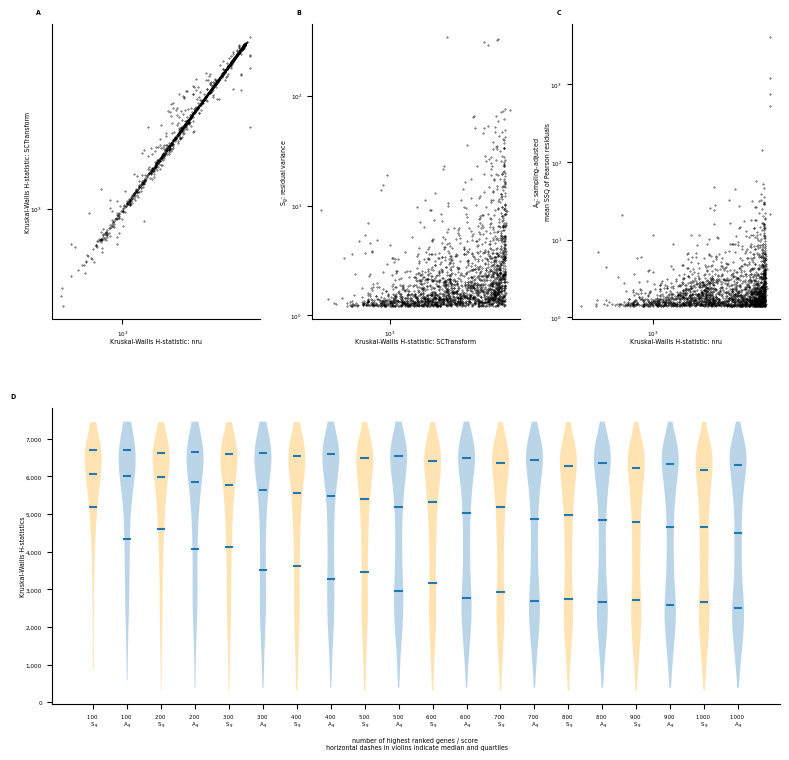

In [18]:
fig = plt.figure( figsize=( 8, 8 ) )

gs = GridSpec( 2, 3  )

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

######

ax1.scatter ( df_plot_both[ 'nru_H_stat' ],df_plot_both['SCT_H_stat'], marker='o', color='k',  s=0.1)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel ( 'Kruskal-Wallis H-statistic: nru', fontsize=4.5, labelpad=-0.20 )	  
ax1.set_ylabel ( 'Kruskal-Wallis H-statistic: SCTransform',fontsize=4.5, labelpad=-0.20 )
ax1.tick_params(labelsize=4.1, which='major' )    
ax1.minorticks_off()
	
right = ax1.spines["right"]	
right.set_visible(False)
top = ax1.spines["top"]	
top.set_visible(False)

ax1.text(-0.05, 1.05, 'A', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax1.transAxes,)



ax2.scatter ( df_plot_SCT[ 'SCT_H_stat' ],df_plot_SCT['S_g'], marker='o', color='k',  s=0.1)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel ( 'Kruskal-Wallis H-statistic: SCTransform',fontsize=4.5, labelpad=-0.20 )	
ax2.set_ylabel ( '$S_g$: residual variance', fontsize=4.5, labelpad=-0.20 )	  
ax2.tick_params(labelsize=4.1, which='major' )    
ax2.minorticks_off()
	
right = ax2.spines["right"]	
right.set_visible(False)
top = ax2.spines["top"]	
top.set_visible(False)

ax2.text(-0.05, 1.05, 'B', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax2.transAxes,)



ax3.scatter ( df_plot_nru[ 'nru_H_stat' ],df_plot_nru['A_g'] , marker='o', color='k',  s=0.1)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel ( 'Kruskal-Wallis H-statistic: nru',fontsize=4.5, labelpad=-0.20 )	
ax3.set_ylabel ( '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', fontsize=4.5, labelpad=-0.20 )	  
ax3.tick_params(labelsize=4.1, which='major' )    
ax3.minorticks_off()
	
right = ax3.spines["right"]	
right.set_visible(False)
top = ax3.spines["top"]	
top.set_visible(False)

ax3.text(-0.05, 1.05, 'C', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax3.transAxes,)
 


params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params) 
 
n_groups = len ( boxplot_DE_list ) 
 
violin_parts = ax4.violinplot( boxplot_DE_list , showextrema = False,   showmedians = True, quantiles= n_groups* [[.25,.75]] )

for i_sct in range ( n_groups // 2 ):
  pc = violin_parts['bodies'][2*i_sct]
  pc.set_facecolor('orange')


ax4.set_xticks( list ( range ( 1,  1 + n_groups ) ) )

ax4.tick_params(labelsize=4.1)   
ax4.set_xticklabels( label_list, fontsize=3.9 )  

ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax4.set_xlabel ( '\n number of highest ranked genes / score  \n horizontal dashes in violins indicate median and quartiles', fontsize=4.5, labelpad=-0.0 )
ax4.set_ylabel ( 'Kruskal-Wallis H-statistics',fontsize=4.5, labelpad=-0.20 )	
  
	
right = ax4.spines["right"]	
right.set_visible(False)
top = ax4.spines["top"]	
top.set_visible(False)
  
ax4.text(-0.05, 1.05, 'D', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax4.transAxes,) 
      


plt.subplots_adjust( left=0.07, right=0.98, bottom=0.1,  top=0.95, wspace=0.25, hspace=0.3 )
  
plt.savefig( plot_dsn, transparent=True, dpi=300 ) 

In [19]:
df_DE_stats_SCT.to_pickle ( DE_stats_dsn )